Classes: ['barren_land' 'forest' 'urban' 'water']
Features Shape: (307, 13), Labels Shape: (307,)

SVM Accuracy: 0.9032258064516129
SVM Classification Report:
               precision    recall  f1-score   support

 barren_land       0.79      0.75      0.77        20
      forest       1.00      0.97      0.99        34
       urban       0.83      0.89      0.86        27
       water       1.00      1.00      1.00        12

    accuracy                           0.90        93
   macro avg       0.90      0.90      0.90        93
weighted avg       0.90      0.90      0.90        93


Random Forest Accuracy: 0.946236559139785
Random Forest Classification Report:
               precision    recall  f1-score   support

 barren_land       1.00      0.80      0.89        20
      forest       1.00      1.00      1.00        34
       urban       0.84      1.00      0.92        27
       water       1.00      0.92      0.96        12

    accuracy                           0.95        9

C:\Users\praja\.local\share\mamba\envs\lpdaac_tutorials\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\praja\.local\share\mamba\envs\lpdaac_tutorials\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4336 - loss: 78.7758 - val_accuracy: 0.7204 - val_loss: 13.6096
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6537 - loss: 19.6554 - val_accuracy: 0.8065 - val_loss: 4.1394
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7346 - loss: 6.9837 - val_accuracy: 0.8495 - val_loss: 2.3640
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7536 - loss: 7.1568 - val_accuracy: 0.7957 - val_loss: 4.5864
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8032 - loss: 5.5216 - val_accuracy: 0.8817 - val_loss: 2.5705
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8232 - loss: 3.4526 - val_accuracy: 0.7957 - val_loss: 5.2801
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8012 - loss: 5.0303 - val_accuracy: 0.8817 - val_loss: 2.0519
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7981 - loss: 4.4778 - val_accuracy: 0.8387 - val_loss: 3.108

C:\Users\praja\AppData\Local\Temp\ipykernel_9300\1160996827.py:283: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgb_color = np.array(plt.cm.get_cmap('tab10')(class_id)[:3]) * 255  # Convert to RGB


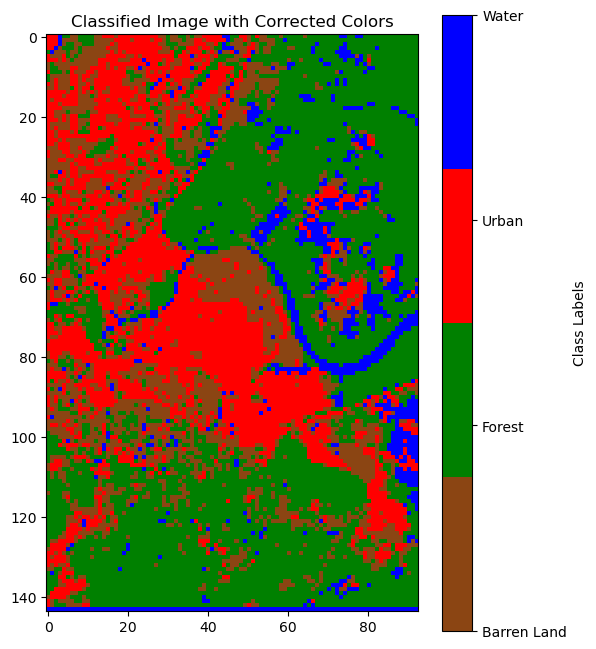

In [40]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Define paths to shapefiles
shapefile_paths = {
    "water": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Water_Training_Samples.shp",
    "barren_land": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Barren_Land_Training_Samples.shp",
    "forest": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Forest_Training_Samples.shp",
    "urban": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Urban_Training_Samples.shp"
}

# Load and merge all shapefiles
training_samples = []
for class_name, path in shapefile_paths.items():
    gdf = gpd.read_file(path)
    gdf["class"] = class_name  # Assign class labels (water, barren_land, etc.)
    training_samples.append(gdf)

# Convert to a single GeoDataFrame
training_samples = pd.concat(training_samples, ignore_index=True)

# Extract coordinates
coords = np.array([[point.x, point.y] for point in training_samples.geometry])
labels = training_samples["class"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
print(f"Classes: {label_encoder.classes_}")


# Function to extract pixel values at given coordinates
def extract_pixels(coords, raster_src):
    pixels = []
    for x, y in coords:
        row, col = raster_src.index(x, y)
        pixels.append(raster_src.read()[:, row, col])  # Extract all bands
    return np.array(pixels)

# Path to satellite image
image_path = r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Problem_statement_1_data\imgs_2\Composite_img_2_IEEE.tif"

# Extract features
with rasterio.open(image_path) as src:
    X = extract_pixels(coords, src)

print(f"Features Shape: {X.shape}, Labels Shape: {y_encoded.shape}")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\nLightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb, target_names=label_encoder.classes_))


import tensorflow as tf
from tensorflow import keras

# Define MLP Model
mlp_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(len(label_encoder.classes_), activation="softmax")  # Output layer
])

# Compile Model
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

print("\nMLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

import xgboost as xgb

# Define XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost Model
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


print("\nFinal Model Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"MLP Neural Network Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

import joblib

model_path = r"F:\Extra\Hackathon IEEE\trained_model1.pkl"
joblib.dump(rf_model, model_path)  # Replace rf_model with your actual Random Forest model
print(f"Model saved at: {model_path}")


import numpy as np
import rasterio
import joblib  # For loading trained models
from rasterio.plot import show
from sklearn.preprocessing import StandardScaler

# Define paths
image_path = r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Problem_statement_1_data\imgs_2\Composite_img_2_IEEE.tif"
model_path = r"F:\Extra\Hackathon IEEE\trained_model1.pkl"  # Update with actual trained model path
output_classified_image = r"F:\Extra\Hackathon IEEE\classified_map_2018.tif"

# Load trained model (Random Forest / LightGBM)
model = joblib.load(model_path)

# Open satellite image
with rasterio.open(image_path) as src:
    img_array = src.read()  # Read all bands
    profile = src.profile  # Save profile for output image

# Reshape image into (num_pixels, num_bands)
num_bands, height, width = img_array.shape
img_array = img_array.reshape(num_bands, -1).T  # Reshape to (num_pixels, num_bands)

# Normalize using StandardScaler (if required)
scaler = StandardScaler()
img_array = scaler.fit_transform(img_array)

# Predict land cover classes
predicted_labels = model.predict(img_array)

# Reshape predictions back to (height, width)
classified_image = predicted_labels.reshape(height, width)

# Save the classified image
profile.update(dtype=rasterio.uint8, count=1)  # Update profile for single-band output

with rasterio.open(output_classified_image, "w", **profile) as dst:
    dst.write(classified_image.astype(rasterio.uint8), 1)

print(f"Classified image saved at: {output_classified_image}")


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


import joblib
joblib.dump(scaler, "scaler.pkl")  # Save
scaler = joblib.load("scaler.pkl")  # Load before classifying

import rasterio
import numpy as np

# Open satellite image
with rasterio.open(image_path) as src:
    image_data = src.read()  # Read all bands
    image_shape = image_data.shape  # Shape: (bands, height, width)

# Reshape image into (pixels, bands) format
X_predict = image_data.reshape(image_shape[0], -1).T  # Transpose to (pixels, bands)

print(f"Image shape for prediction: {X_predict.shape}")  # Should be (total_pixels, bands)

predictions = model.predict(X_predict)
print(f"Unique Predicted Classes: {set(predictions)}")  # Check if all classes are present

# Reshape to original image size
classified_image = predictions.reshape(image_shape[1], image_shape[2])


from rasterio.transform import from_origin

# Save as GeoTIFF
with rasterio.open(
    output_classified_image,
    "w",
    driver="GTiff",
    height=image_shape[1],
    width=image_shape[2],
    count=1,  # Single band classification
    dtype=rasterio.uint8,
    crs=src.crs,
    transform=src.transform
) as dst:
    dst.write(classified_image.astype(rasterio.uint8), 1)

print(f"Classified image saved at: {output_classified_image}")


print(f"Original Image Shape: {image_shape}")  # Should match (bands, height, width)
print(f"Predictions Shape: {predictions.shape}")  # Should match (height * width,)

classified_image = predictions.reshape(image_shape[1], image_shape[2])  # Reshape to (height, width)
print(f"Reshaped Classified Image: {classified_image.shape}")



import numpy as np

unique_classes = np.unique(classified_image)
print(f"Unique Classes in Classified Image: {unique_classes}")


from collections import Counter
print(f"Class Distribution in Predictions: {Counter(predictions)}")



import rasterio
import numpy as np

with rasterio.open(output_classified_image) as src:
    classified_data = src.read(1)  # Read first (only) band
    unique_classes, counts = np.unique(classified_data, return_counts=True)
    print(f"Unique classes in raster: {unique_classes}")
    print(f"Pixel counts per class: {dict(zip(unique_classes, counts))}")



import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Define class labels and corresponding colors
class_colors = {
    0: ("Barren Land", "saddlebrown"),  # Brown
    1: ("Forest", "green"),            # Green
    2: ("Urban", "red"),               # Red
    3: ("Water", "blue")               # Blue
}

# Load classified image
classified_image_path = r"F:\Extra\Hackathon IEEE\classified_map_2018.tif"
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)  # Read first band

# Create a color-mapped image
unique_classes = np.unique(classified_image)
colored_image = np.zeros((*classified_image.shape, 3), dtype=np.uint8)

for class_id, (class_name, color) in class_colors.items():
    mask = classified_image == class_id
    rgb_color = np.array(plt.cm.get_cmap('tab10')(class_id)[:3]) * 255  # Convert to RGB
    colored_image[mask] = rgb_color

# Plot classified image with legend
fig, ax = plt.subplots(figsize=(6, 8))
im = ax.imshow(classified_image, cmap=plt.cm.colors.ListedColormap([class_colors[i][1] for i in unique_classes]))
cbar = plt.colorbar(im, ax=ax, ticks=unique_classes)
cbar.set_label("Class Labels")
cbar.set_ticklabels([class_colors[i][0] for i in unique_classes])

ax.set_title("Classified Image with Corrected Colors")
plt.show()








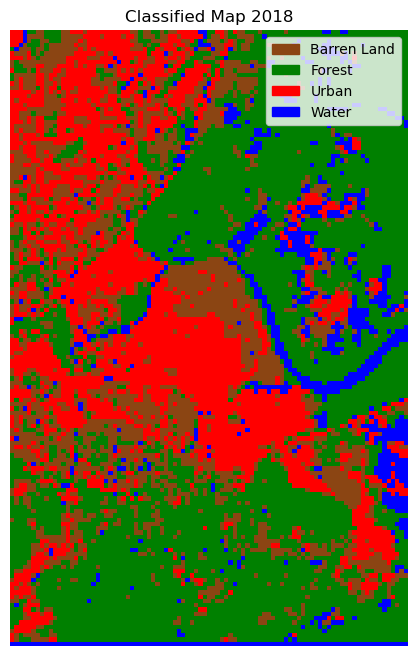

Classified image with legend saved at: F:\Extra\Hackathon IEEE\classified_map_2018.png


In [81]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import matplotlib.patches as mpatches

# Define class labels and corresponding colors
class_colors = {
    0: ("Barren Land", "saddlebrown"),  # Brown
    1: ("Forest", "green"),            # Green
    2: ("Urban", "red"),               # Red
    3: ("Water", "blue")               # Blue
}

# Load classified image
classified_image_path = r"F:\Extra\Hackathon IEEE\classified_map_2018.tif"
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)  # Read first band

# Extract unique classes present in the image
unique_classes = np.unique(classified_image)

# Create a color-mapped image
colored_image = np.zeros((*classified_image.shape, 3), dtype=np.uint8)
for class_id, (class_name, color) in class_colors.items():
    mask = classified_image == class_id
    rgb_color = np.array(plt.cm.colors.to_rgb(color)) * 255  # Convert color name to RGB
    colored_image[mask] = rgb_color

# Plot classified image
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(colored_image)

# Create legend manually
legend_patches = [mpatches.Patch(color=class_colors[i][1], label=class_colors[i][0]) for i in unique_classes]
ax.legend(handles=legend_patches, loc="upper right", fontsize=10)

# Set title
ax.set_title("Classified Map 2018")

# Remove axes
ax.axis("off")

# Save the plot as a PNG file
output_png_path = r"F:\Extra\Hackathon IEEE\classified_map_2018.png"
plt.savefig(output_png_path, format="png", bbox_inches="tight", dpi=300)

# Display the image
plt.show()

print(f"Classified image with legend saved at: {output_png_path}")



Classes: ['barren_land' 'forest' 'urban' 'water']
Features Shape: (307, 13), Labels Shape: (307,)

SVM Accuracy: 0.9354838709677419
SVM Classification Report:
               precision    recall  f1-score   support

 barren_land       0.89      0.80      0.84        20
      forest       1.00      1.00      1.00        34
       urban       0.86      0.93      0.89        27
       water       1.00      1.00      1.00        12

    accuracy                           0.94        93
   macro avg       0.94      0.93      0.93        93
weighted avg       0.94      0.94      0.93        93


Random Forest Accuracy: 0.956989247311828
Random Forest Classification Report:
               precision    recall  f1-score   support

 barren_land       0.95      0.90      0.92        20
      forest       1.00      1.00      1.00        34
       urban       0.90      0.96      0.93        27
       water       1.00      0.92      0.96        12

    accuracy                           0.96        9

C:\Users\praja\.local\share\mamba\envs\lpdaac_tutorials\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\praja\.local\share\mamba\envs\lpdaac_tutorials\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4064 - loss: 105.7943 - val_accuracy: 0.7849 - val_loss: 18.8738
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7691 - loss: 15.7542 - val_accuracy: 0.8495 - val_loss: 7.5882
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8506 - loss: 8.1320 - val_accuracy: 0.9140 - val_loss: 3.5038
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8894 - loss: 6.2260 - val_accuracy: 0.9570 - val_loss: 1.1549
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9132 - loss: 2.4566 - val_accuracy: 0.8817 - val_loss: 3.1053
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8754 - loss: 5.4057 - val_accuracy: 0.7957 - val_loss: 6.0778
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8504 - loss: 3.5405 - val_accuracy: 0.9140 - val_loss: 1.7266
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8642 - loss: 3.1361 - val_accuracy: 0.9570 - val_loss: 1.0

C:\Users\praja\AppData\Local\Temp\ipykernel_9300\3333914587.py:283: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  rgb_color = np.array(plt.cm.get_cmap('tab10')(class_id)[:3]) * 255  # Convert to RGB


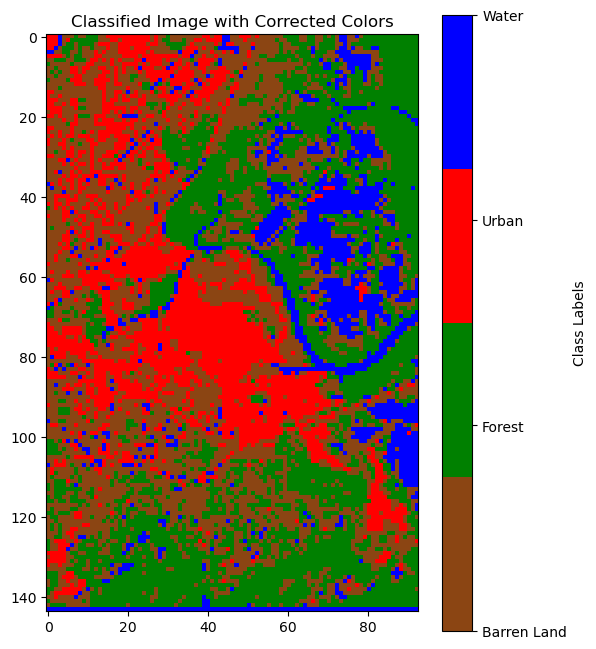

In [41]:
import geopandas as gpd
import pandas as pd
import numpy as np
import rasterio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Define paths to shapefiles
shapefile_paths = {
    "water": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Water_Training_Samples.shp",
    "barren_land": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Barren_Land_Training_Samples.shp",
    "forest": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Forest_Training_Samples.shp",
    "urban": r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Training data\IEEE Hackathon Training samples-20250329T140603Z-001\IEEE Hackathon Training samples\Urban_Training_Samples.shp"
}

# Load and merge all shapefiles
training_samples = []
for class_name, path in shapefile_paths.items():
    gdf = gpd.read_file(path)
    gdf["class"] = class_name  # Assign class labels (water, barren_land, etc.)
    training_samples.append(gdf)

# Convert to a single GeoDataFrame
training_samples = pd.concat(training_samples, ignore_index=True)

# Extract coordinates
coords = np.array([[point.x, point.y] for point in training_samples.geometry])
labels = training_samples["class"].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)
print(f"Classes: {label_encoder.classes_}")


# Function to extract pixel values at given coordinates
def extract_pixels(coords, raster_src):
    pixels = []
    for x, y in coords:
        row, col = raster_src.index(x, y)
        pixels.append(raster_src.read()[:, row, col])  # Extract all bands
    return np.array(pixels)

# Path to satellite image
image_path = r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Problem_statement_1_data\imgs_1\Composite_img_1_IEEE.tif"

# Extract features
with rasterio.open(image_path) as src:
    X = extract_pixels(coords, src)

print(f"Features Shape: {X.shape}, Labels Shape: {y_encoded.shape}")

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("\nSVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm, target_names=label_encoder.classes_))

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

print("\nLightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb, target_names=label_encoder.classes_))


import tensorflow as tf
from tensorflow import keras

# Define MLP Model
mlp_model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(len(label_encoder.classes_), activation="softmax")  # Output layer
])

# Compile Model
mlp_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Predict
y_pred_mlp = np.argmax(mlp_model.predict(X_test), axis=1)

print("\nMLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp, target_names=label_encoder.classes_))

import xgboost as xgb

# Define XGBoost Model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost Model
print("\nXGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))


print("\nFinal Model Comparison:")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"LightGBM Accuracy: {accuracy_score(y_test, y_pred_lgb):.4f}")
print(f"MLP Neural Network Accuracy: {accuracy_score(y_test, y_pred_mlp):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")

import joblib

model_path = r"F:\Extra\Hackathon IEEE\trained_model.pkl"
joblib.dump(rf_model, model_path)  # Replace rf_model with your actual Random Forest model
print(f"Model saved at: {model_path}")


import numpy as np
import rasterio
import joblib  # For loading trained models
from rasterio.plot import show
from sklearn.preprocessing import StandardScaler

# Define paths
image_path = r"F:\Extra\Hackathon IEEE\Problem_statement_1_data-20250322T071048Z-001\Problem_statement_1_data\imgs_1\Composite_img_1_IEEE.tif"
model_path = r"F:\Extra\Hackathon IEEE\trained_model.pkl"  # Update with actual trained model path
output_classified_image = r"F:\Extra\Hackathon IEEE\classified_map_2017.tif"

# Load trained model (Random Forest / LightGBM)
model = joblib.load(model_path)

# Open satellite image
with rasterio.open(image_path) as src:
    img_array = src.read()  # Read all bands
    profile = src.profile  # Save profile for output image

# Reshape image into (num_pixels, num_bands)
num_bands, height, width = img_array.shape
img_array = img_array.reshape(num_bands, -1).T  # Reshape to (num_pixels, num_bands)

# Normalize using StandardScaler (if required)
scaler = StandardScaler()
img_array = scaler.fit_transform(img_array)

# Predict land cover classes
predicted_labels = model.predict(img_array)

# Reshape predictions back to (height, width)
classified_image = predicted_labels.reshape(height, width)

# Save the classified image
profile.update(dtype=rasterio.uint8, count=1)  # Update profile for single-band output

with rasterio.open(output_classified_image, "w", **profile) as dst:
    dst.write(classified_image.astype(rasterio.uint8), 1)

print(f"Classified image saved at: {output_classified_image}")


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


import joblib
joblib.dump(scaler, "scaler.pkl")  # Save
scaler = joblib.load("scaler.pkl")  # Load before classifying

import rasterio
import numpy as np

# Open satellite image
with rasterio.open(image_path) as src:
    image_data = src.read()  # Read all bands
    image_shape = image_data.shape  # Shape: (bands, height, width)

# Reshape image into (pixels, bands) format
X_predict = image_data.reshape(image_shape[0], -1).T  # Transpose to (pixels, bands)

print(f"Image shape for prediction: {X_predict.shape}")  # Should be (total_pixels, bands)

predictions = model.predict(X_predict)
print(f"Unique Predicted Classes: {set(predictions)}")  # Check if all classes are present

# Reshape to original image size
classified_image = predictions.reshape(image_shape[1], image_shape[2])


from rasterio.transform import from_origin

# Save as GeoTIFF
with rasterio.open(
    output_classified_image,
    "w",
    driver="GTiff",
    height=image_shape[1],
    width=image_shape[2],
    count=1,  # Single band classification
    dtype=rasterio.uint8,
    crs=src.crs,
    transform=src.transform
) as dst:
    dst.write(classified_image.astype(rasterio.uint8), 1)

print(f"Classified image saved at: {output_classified_image}")


print(f"Original Image Shape: {image_shape}")  # Should match (bands, height, width)
print(f"Predictions Shape: {predictions.shape}")  # Should match (height * width,)

classified_image = predictions.reshape(image_shape[1], image_shape[2])  # Reshape to (height, width)
print(f"Reshaped Classified Image: {classified_image.shape}")



import numpy as np

unique_classes = np.unique(classified_image)
print(f"Unique Classes in Classified Image: {unique_classes}")


from collections import Counter
print(f"Class Distribution in Predictions: {Counter(predictions)}")



import rasterio
import numpy as np

with rasterio.open(output_classified_image) as src:
    classified_data = src.read(1)  # Read first (only) band
    unique_classes, counts = np.unique(classified_data, return_counts=True)
    print(f"Unique classes in raster: {unique_classes}")
    print(f"Pixel counts per class: {dict(zip(unique_classes, counts))}")



import matplotlib.pyplot as plt
import numpy as np
import rasterio

# Define class labels and corresponding colors
class_colors = {
    0: ("Barren Land", "saddlebrown"),  # Brown
    1: ("Forest", "green"),            # Green
    2: ("Urban", "red"),               # Red
    3: ("Water", "blue")               # Blue
}

# Load classified image
classified_image_path = r"F:\Extra\Hackathon IEEE\classified_map_2017.tif"
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)  # Read first band

# Create a color-mapped image
unique_classes = np.unique(classified_image)
colored_image = np.zeros((*classified_image.shape, 3), dtype=np.uint8)

for class_id, (class_name, color) in class_colors.items():
    mask = classified_image == class_id
    rgb_color = np.array(plt.cm.get_cmap('tab10')(class_id)[:3]) * 255  # Convert to RGB
    colored_image[mask] = rgb_color

# Plot classified image with legend
fig, ax = plt.subplots(figsize=(6, 8))
im = ax.imshow(classified_image, cmap=plt.cm.colors.ListedColormap([class_colors[i][1] for i in unique_classes]))
cbar = plt.colorbar(im, ax=ax, ticks=unique_classes)
cbar.set_label("Class Labels")
cbar.set_ticklabels([class_colors[i][0] for i in unique_classes])

ax.set_title("Classified Image with Corrected Colors")
plt.show()








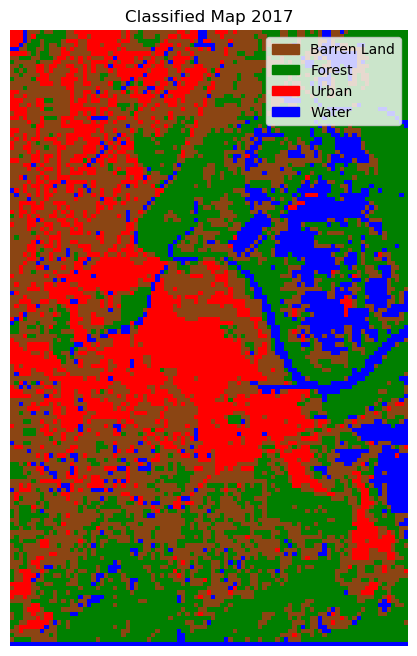

Classified image with legend saved at: F:\Extra\Hackathon IEEE\classified_map_2017.png


In [82]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import matplotlib.patches as mpatches

# Define class labels and corresponding colors
class_colors = {
    0: ("Barren Land", "saddlebrown"),  # Brown
    1: ("Forest", "green"),            # Green
    2: ("Urban", "red"),               # Red
    3: ("Water", "blue")               # Blue
}

# Load classified image
classified_image_path = r"F:\Extra\Hackathon IEEE\classified_map_2017.tif"
with rasterio.open(classified_image_path) as src:
    classified_image = src.read(1)  # Read first band

# Extract unique classes present in the image
unique_classes = np.unique(classified_image)

# Create a color-mapped image
colored_image = np.zeros((*classified_image.shape, 3), dtype=np.uint8)
for class_id, (class_name, color) in class_colors.items():
    mask = classified_image == class_id
    rgb_color = np.array(plt.cm.colors.to_rgb(color)) * 255  # Convert color name to RGB
    colored_image[mask] = rgb_color

# Plot classified image
fig, ax = plt.subplots(figsize=(6, 8))
ax.imshow(colored_image)

# Create legend manually
legend_patches = [mpatches.Patch(color=class_colors[i][1], label=class_colors[i][0]) for i in unique_classes]
ax.legend(handles=legend_patches, loc="upper right", fontsize=10)

# Set title
ax.set_title("Classified Map 2017")

# Remove axes
ax.axis("off")

# Save the plot as a PNG file
output_png_path = r"F:\Extra\Hackathon IEEE\classified_map_2017.png"
plt.savefig(output_png_path, format="png", bbox_inches="tight", dpi=300)

# Display the image
plt.show()

print(f"Classified image with legend saved at: {output_png_path}")



In [45]:
import numpy as np
import rasterio

# Load images again
with rasterio.open(r"F:\Extra\Hackathon IEEE\classified_map_2017.tif") as src2017:
    classified_2017 = src2017.read(1)

with rasterio.open(r"F:\Extra\Hackathon IEEE\classified_map_2018.tif") as src2018:
    classified_2018 = src2018.read(1)

# Compare images
if np.array_equal(classified_2017, classified_2018):
    print("Warning: No changes detected! The 2017 and 2018 maps are identical.")
else:
    print("Changes detected, proceeding with change detection.")


Changes detected, proceeding with change detection.


In [46]:
print("Unique values in 2017 classification:", np.unique(classified_2017))
print("Unique values in 2018 classification:", np.unique(classified_2018))


Unique values in 2017 classification: [0 1 2 3]
Unique values in 2018 classification: [0 1 2 3]


In [47]:
classified_2017 = classified_2017.astype(int)
classified_2018 = classified_2018.astype(int)


Binary change map saved at: F:\Extra\Hackathon IEEE\binary_change_map.tif
Total changed area: 0.00 km²


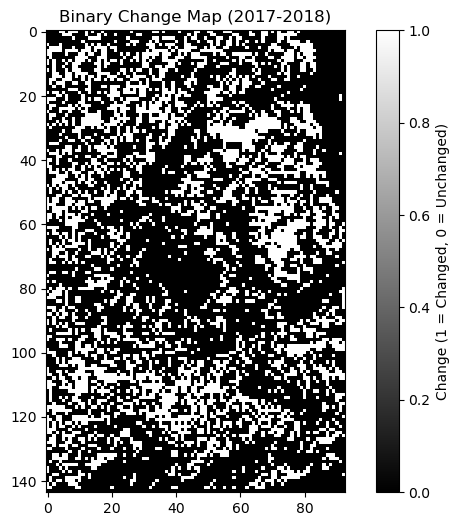

In [48]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define paths for input and output files
classified_2017_path = r"F:\Extra\Hackathon IEEE\classified_map_2017.tif"
classified_2018_path = r"F:\Extra\Hackathon IEEE\classified_map_2018.tif"
binary_change_map_path = r"F:\Extra\Hackathon IEEE\binary_change_map.tif"

# Load classified images
with rasterio.open(classified_2017_path) as src2017:
    classified_2017 = src2017.read(1)
    profile = src2017.profile  # Save metadata
    pixel_size = src2017.res[0]  # Get pixel resolution

with rasterio.open(classified_2018_path) as src2018:
    classified_2018 = src2018.read(1)

# Ensure both images have the same dimensions
assert classified_2017.shape == classified_2018.shape, "Error: Images have different dimensions!"

# Generate binary change map (1 = changed, 0 = unchanged)
binary_change_map = np.where(classified_2017 != classified_2018, 1, 0)

# Save binary change map
profile.update(dtype=rasterio.uint8, count=1)

with rasterio.open(binary_change_map_path, "w", **profile) as dst:
    dst.write(binary_change_map.astype(np.uint8), 1)

print(f"Binary change map saved at: {binary_change_map_path}")

# Calculate change area in km²
pixel_area_km2 = (pixel_size * pixel_size) / 1e6  # Convert m² to km²
changed_pixels = np.sum(binary_change_map == 1)
change_area_km2 = changed_pixels * pixel_area_km2

print(f"Total changed area: {change_area_km2:.2f} km²")

# Plot binary change map
plt.figure(figsize=(8, 6))
plt.imshow(binary_change_map, cmap="gray")
plt.colorbar(label="Change (1 = Changed, 0 = Unchanged)")
plt.title("Binary Change Map (2017-2018)")
plt.show()


In [52]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

input_raster = "F:/Extra/Hackathon IEEE/binary_change_map.tif"
output_raster = "F:/Extra/Hackathon IEEE/binary_change_map_meters.tif"

# Open the original raster
with rasterio.open(input_raster) as src:
    dst_crs = "EPSG:3857"  # Change to EPSG:32643 if in India
    
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    
    kwargs = src.meta.copy()
    kwargs.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height
    })

    with rasterio.open(output_raster, "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest
            )

print("✅ Reprojection complete! Now rerun your area calculation.")


✅ Reprojection complete! Now rerun your area calculation.


In [55]:
import rasterio
import numpy as np

binary_raster = "F:/Extra/Hackathon IEEE/binary_change_map_meters.tif"

with rasterio.open(binary_raster) as src:
    binary_data = src.read(1)  # Read the first band
    pixel_size_x, pixel_size_y = src.transform[0], -src.transform[4]  # Extract pixel size (64.4m)
    
    # Count changed pixels (assuming 1 = changed, 0 = unchanged)
    total_changed_pixels = np.count_nonzero(binary_data == 1)
    
    # Convert to area in square kilometers
    changed_area_km2 = (total_changed_pixels * pixel_size_x * pixel_size_y) / 1e6  

print(f"✅ Total changed area: {changed_area_km2:.2f} km²")


✅ Total changed area: 17.74 km²


In [57]:
pip install matplotlib-scalebar


Note: you may need to restart the kernel to use updated packages.


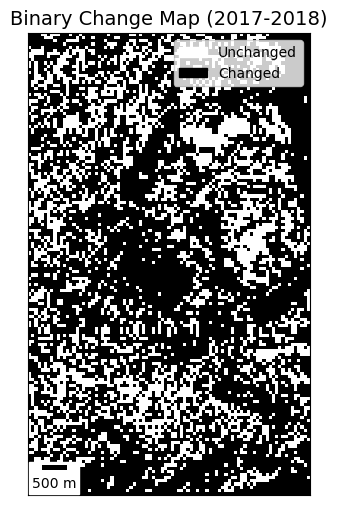

✅ Binary change map saved at: F:/Extra/Hackathon IEEE/binary_change_map.png


In [58]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib_scalebar.scalebar import ScaleBar

# File paths
binary_raster = "F:/Extra/Hackathon IEEE/binary_change_map_meters.tif"
output_png = "F:/Extra/Hackathon IEEE/binary_change_map.png"

# Open raster file
with rasterio.open(binary_raster) as src:
    binary_data = src.read(1)  # Read the first band
    transform = src.transform
    pixel_size_x, pixel_size_y = transform[0], -transform[4]  # Extract pixel size in meters

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))
cmap = plt.get_cmap("gray")  # Use grayscale (0 = unchanged, 1 = changed)

# Plot the binary change map
img = ax.imshow(binary_data, cmap=cmap, interpolation="nearest")

# Add title
ax.set_title("Binary Change Map (2017-2018)", fontsize=14)

# Add legend
legend_patches = [
    mpatches.Patch(color="white", label="Unchanged"),
    mpatches.Patch(color="black", label="Changed")
]
ax.legend(handles=legend_patches, loc="upper right")

# Add scale bar
scalebar = ScaleBar(pixel_size_x, units="m", location="lower left", length_fraction=0.1)
ax.add_artist(scalebar)

# Remove axis labels
ax.set_xticks([])
ax.set_yticks([])

# Save the image
plt.savefig(output_png, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Binary change map saved at: {output_png}")



In [88]:
import numpy as np
import rasterio
from collections import Counter

# Load the classified images for both years
classified_image_2017_path = r"F:\Extra\Hackathon IEEE\classified_map_2017.tif"
classified_image_2018_path = r"F:\Extra\Hackathon IEEE\classified_map_2018.tif"

# Read the images to verify pixel values
with rasterio.open(classified_image_2017_path) as src_2017:
    classified_image_2017 = src_2017.read(1)  # Reading the first band (single-band raster)

with rasterio.open(classified_image_2018_path) as src_2018:
    classified_image_2018 = src_2018.read(1)  # Reading the first band (single-band raster)

# Define pixel area (10m x 10m = 100 m²)
pixel_area = 100  # in square meters

# Calculate pixel counts for each class in 2017 and 2018
class_counts_2017 = Counter(classified_image_2017.flatten())
class_counts_2018 = Counter(classified_image_2018.flatten())

# Initialize the class labels and their corresponding names
class_labels = {
    0: "Barren Land",
    1: "Forest",
    2: "Urban",
    3: "Water"
}

# Calculate area for each class and the area gain/loss
for class_id, class_name in class_labels.items():
    area_2017 = class_counts_2017.get(class_id, 0) * pixel_area  # Area in 2017
    area_2018 = class_counts_2018.get(class_id, 0) * pixel_area  # Area in 2018
    
    # Calculate gain and loss
    area_gain = max(area_2018 - area_2017, 0)
    area_loss = max(area_2017 - area_2018, 0)
    
    # Print results for each class
    print(f"Class: {class_name}")
    print(f"  2017 Area: {area_2017} m²")
    print(f"  2018 Area: {area_2018} m²")
    print(f"  Area Gain: {area_gain} m²")
    print(f"  Area Loss: {area_loss} m²")
    print()  # Line break between class outputs


Class: Barren Land
  2017 Area: 498100 m²
  2018 Area: 300900 m²
  Area Gain: 0 m²
  Area Loss: 197200 m²

Class: Forest
  2017 Area: 424700 m²
  2018 Area: 618100 m²
  Area Gain: 193400 m²
  Area Loss: 0 m²

Class: Urban
  2017 Area: 262700 m²
  2018 Area: 316900 m²
  Area Gain: 54200 m²
  Area Loss: 0 m²

Class: Water
  2017 Area: 153700 m²
  2018 Area: 103300 m²
  Area Gain: 0 m²
  Area Loss: 50400 m²

